We start with importing all the necessary libraries and loading the test data. We excusively analyse Adani ports here, but later would be comparing with other companies as well.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('test.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


We check for null columns and then remove the columns considering a lot of rows are null

In [52]:
print(df.isnull().sum())
df = df.dropna(axis=1)

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


Here we will analyse each column and what it means individually
Close: The closing price of a stock represents the final price at which a stock was traded on a particular day. It is typically the last traded price before the market closes for the day. The close price is widely used by investors and analysts to assess the performance of a stock over a specific time period.

Open: The opening price of a stock signifies the price at which the first trade occurred for the day. It is the initial price at the beginning of the trading session. The opening price is an important indicator as it can provide insights into the market sentiment and investor demand at the start of the trading day.

High: The high price indicates the highest trading price reached by a stock during a particular trading day. It reflects the maximum price at which the stock was bought or sold within that time frame. The high price is useful for identifying the intraday peak or resistance levels of a stock.

Low: The low price represents the lowest trading price reached by a stock during a specific trading day. It indicates the minimum price at which the stock was traded during that time period. The low price is valuable for identifying the intraday troughs or support levels of a stock.

Date: The date parameter signifies the specific day to which the stock market data corresponds. It is important for tracking the historical performance of a stock over time and conducting analysis or comparisons across different dates.

Symbol: The symbol refers to the unique ticker symbol assigned to a particular stock. Ticker symbols are used to identify and differentiate stocks listed on stock exchanges. For example, the symbol for Apple Inc. is "AAPL."

Series: The series parameter is used in some stock markets to categorize different types of securities or market segments. It can indicate whether a stock belongs to the equity segment, debt segment, or any other specific classification. The series parameter is more commonly used in countries like India.

Last: The last price represents the latest traded price of a stock during a trading session. It provides information on the most recent price at which the stock was bought or sold.

VWAP (Volume Weighted Average Price): VWAP is a trading indicator that calculates the average price at which a stock has been traded throughout the day, weighted by the volume of each trade. It is calculated by dividing the total value of all trades by the total volume traded. VWAP is commonly used by institutional investors and algorithmic traders to assess the average price at which they executed their trades relative to the overall market.

Volume: The volume parameter represents the total number of shares or contracts traded for a particular stock on a given day. It provides insights into the level of market activity and liquidity for a stock. Higher trading volumes generally indicate increased investor interest and can suggest the presence of significant market moves.

Turnover: The turnover parameter signifies the total value of all trades conducted for a stock on a specific day. It is calculated by multiplying the volume of shares traded by the corresponding price for each trade. Turnover is a useful metric to assess the overall market activity and the monetary value associated with the trading of a stock.

Trades: The trades parameter refers to the total number of individual trades executed for a stock on a given day. It represents the number of times the stock has changed hands during the trading session. The number of trades can provide insights into the level of market participation and the intensity of buying or selling pressure.

Deliverable Volume: Deliverable volume represents the number of shares or contracts that were actually delivered or transferred between buyers and sellers at the end of a trading day. It indicates the portion of the total trading volume that resulted in the actual exchange of ownership. 

In [53]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741


In [54]:
df.drop(['Symbol', 'Series'], inplace = True,axis=1)
df['Date'] = pd.to_datetime(df['Date'])


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,0.497054,2.196576,3.516790,2.292458,3.182670,3.205412,3.301480,5.931316,9.830624,6.187067,-0.527810
1,2007-11-28,3.207675,3.302000,3.214657,2.843748,2.799565,2.847930,3.077861,0.396425,1.235205,0.175795,-0.802001
2,2007-11-29,2.849991,2.914585,2.835731,2.668819,2.809919,2.797675,2.802904,0.528695,1.325825,-0.098513,-1.477509
3,2007-11-30,2.799708,2.816440,3.053519,2.928562,3.027357,2.991182,3.014862,0.403352,1.223964,0.038237,-1.074323
4,2007-12-03,2.993324,3.073425,3.239835,3.098190,3.291389,3.238569,3.203086,0.005582,0.687596,-0.279827,-1.070584


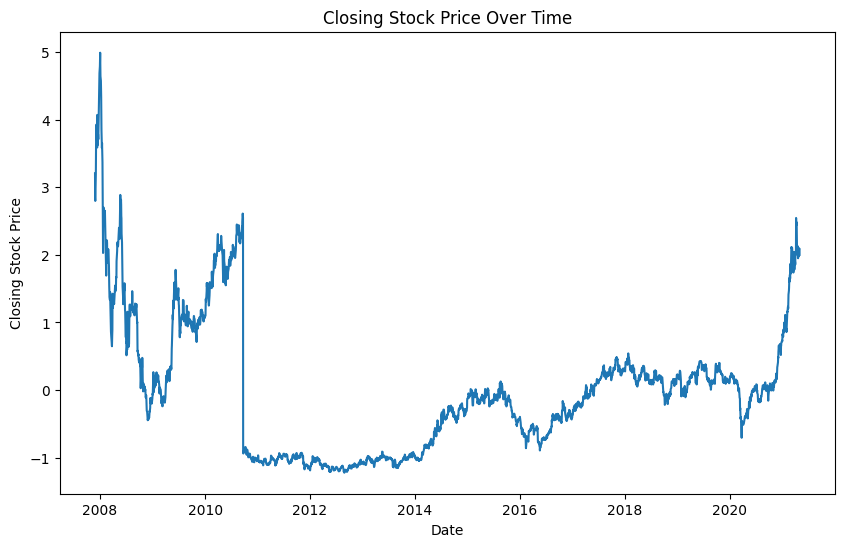

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

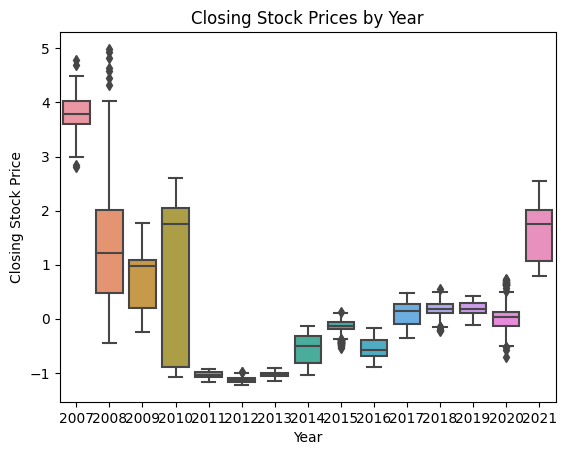

In [56]:
df['Year'] = df['Date'].dt.year
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

We see that there is no visible trend, with fluctations over the years, however a sharp decreasing trend is seen initially, followed by a gradual increase.
We can see seasonality but no cyclicity over the years.

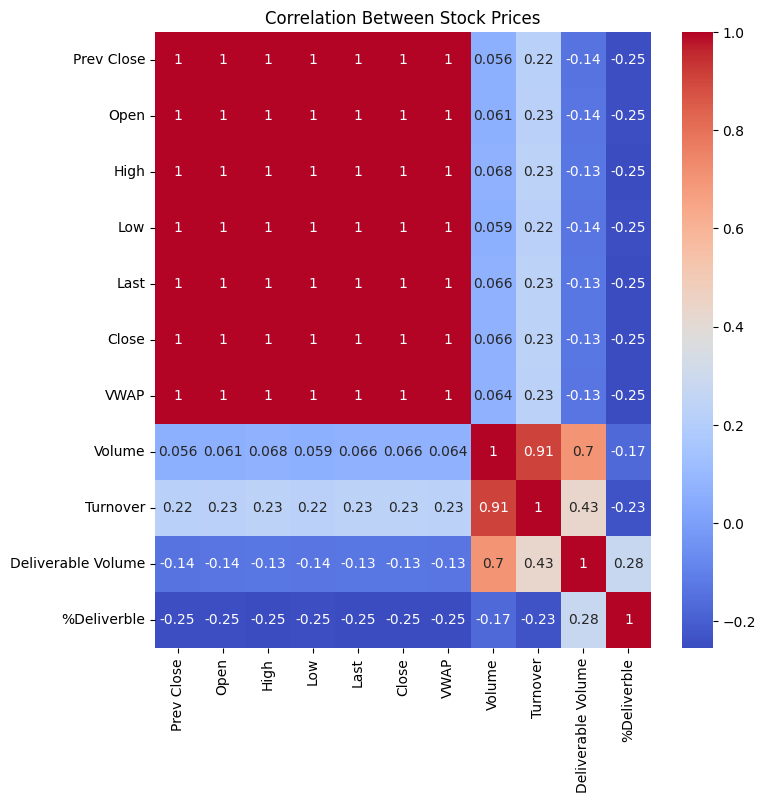

In [57]:
corr = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

We notice that the parameters 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close' and 'VWAP' are highly correlated while the rest are mostly independent. We see that Volume, turnover and deliverable volume are weakly correlated, which could have been undertsood with the definations. 

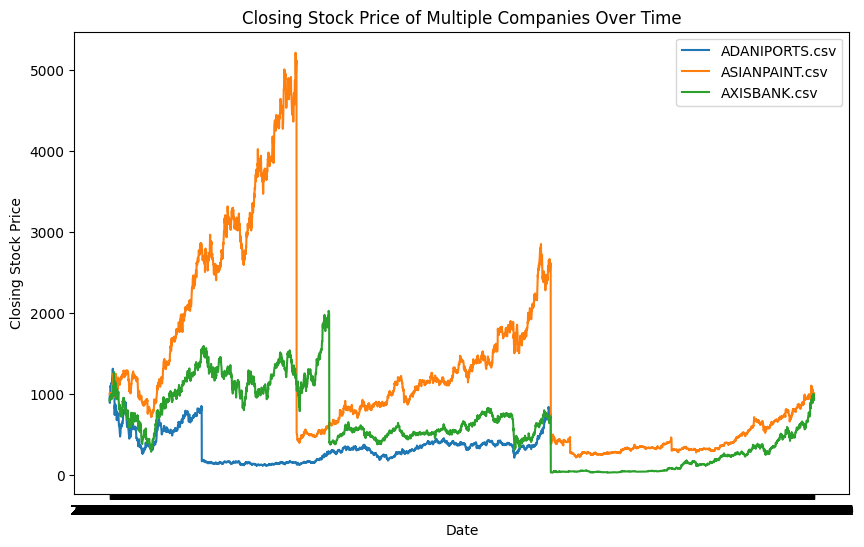

In [59]:
companies = ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv']
plt.figure(figsize=(10, 6))
for company in companies:
    company_df = pd.read_csv(company)
    sns.lineplot(x='Date', y='Close', data=company_df, label=company)
plt.title('Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()